In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.optimize import curve_fit

In [2]:
vims_wave = np.loadtxt('vims_wave.txt')
new_array = ['_0405','_0607','_0809','_1011','_1213','_1415','_1617']
for number in new_array:
    new_string = 'df'+number+' = '+'pd.read_pickle("e_data/data'+number+'.pkl")'
    exec(new_string)

In [3]:
def powerlaw(x,a,b):
    return a*np.power(x,b)

def gaussian(x,a,mu,sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

band_channels = [29,30,31,32,33,34,46,47,48,49,50,51,52,53,54,55,56,57,58,59,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,102,103,104,105]

def fit_line(dataframe):
    spectra = np.average(dataframe)
    my_fit,_ = curve_fit(powerlaw,vims_wave[band_channels],spectra[band_channels],p0=[.15,-12])
    final_fit = powerlaw(vims_wave,*my_fit)
    return final_fit

def custom_fit(dataframe):
    spectra = np.average(dataframe)
    my_fit,_ = curve_fit(powerlaw,vims_wave[band_channels],spectra[band_channels],p0=[.15,-12])
    final_spectra = spectra-powerlaw(vims_wave,*my_fit)
    return final_spectra


In [9]:
spectra_list = []
for number in new_array:
    new_string = 'spectra'+number+' = '+'custom_fit(df'+number+'["spectrum"])'
    exec(new_string)
    spectrum = 'spectra'+number
    new_spectrum = locals()[spectrum]
    spectra_list.append(new_spectrum)

time_list = []
for number in new_array:
    new_string = 'time'+number+' = '+'df'+number+'["ettime"]'
    exec(new_string)
    time = 'time'+number
    new_time = locals()[time]
    time_list.append(new_time)

In [12]:
for part in time_list:
    print(part.size)

2507
3424
749
1487
723
2490
1275


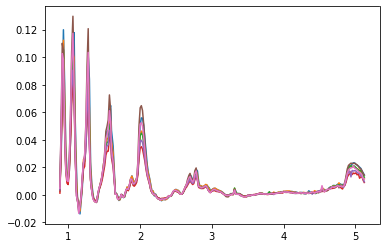

In [13]:
%matplotlib inline
for spectrum in spectra_list:
    plt.plot(vims_wave,spectrum)
plt.show()